In [1]:
from sklearn.datasets import fetch_mldata
from q1 import HopfieldNetwork
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize the mnist data used in the notebook
mnist = fetch_mldata('MNIST original', data_home='.cache')
targets = mnist.target.tolist()

ones = mnist.data[targets.index(1):targets.index(2)]
ones = [[1 if p > 0 else -1 for p in v] for v in ones]
ones = [(x, 1) for x in ones]
random.shuffle(ones)

fives = mnist.data[targets.index(5):targets.index(6)]
fives = [[1 if p > 0 else -1 for p in v] for v in fives]
fives = [(x, 5) for x in fives]
random.shuffle(fives)

testing_set = ones[20:30] + fives[20:30]
random.shuffle(testing_set)

In [2]:
from scipy.misc import imrotate

THRESHOLD = 30

# Functions used for testing network classification accuracy

def plot_accuracy(x, y, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.show()

def add_noise(vector, ratio=0.2):
    indices = range(len(vector))
    num = ratio * len(indices)
    for i in range(int(num)):
        c = random.choice(indices)
        vector[c] = 1 if vector[c] == -1 else -1
        
def show(img, title='', suptitle=''):
    plt.imshow(img)
    plt.title(title)
    plt.suptitle(suptitle)
    plt.show()


def test(network, index, item, sup, plot=False):
    # Measures classification accuracy by diff the activated image vector
    image = np.array(item[0]).reshape(28, 28)
    result = np.array(network.activate(item[0])).reshape(28, 28)
    
    label = item[1]
    
    contrast = np.array(fives[0][0]).reshape(28, 28) if label == 1 else np.array(ones[0][0]).reshape(28, 28)
    
    contrast_norm = np.linalg.norm(contrast - result)
    attempts = [
        result, 
        imrotate(result, angle=30.), 
        imrotate(result, angle=-30.),
    ]

    best_attempt = float('inf')
    
    for r in attempts:
        for attempt in [r, np.invert(r)]:
            attempt_norm = np.linalg.norm(image - attempt)
            if attempt_norm < best_attempt:
                best_attempt = attempt_norm
    if plot:
        show(image, "Input - Example %s" % index, sup)
        show(result, "Output - Example %s" % index, sup)
    
    return best_attempt if best_attempt < contrast_norm else float('inf')


Hebbian accuracy trained with 2 samples: 0.4
Hebbian accuracy trained with 4 samples: 0.5
Hebbian accuracy trained with 6 samples: 0.5
Hebbian accuracy trained with 8 samples: 0.4
Hebbian accuracy trained with 10 samples: 0.45
Hebbian accuracy trained with 12 samples: 0.4
Hebbian accuracy trained with 14 samples: 0.45
Hebbian accuracy trained with 16 samples: 0.45
Hebbian accuracy trained with 18 samples: 0.4
Hebbian accuracy trained with 20 samples: 0.45
Hebbian accuracy trained with 22 samples: 0.45
Hebbian accuracy trained with 24 samples: 0.45
Hebbian accuracy trained with 26 samples: 0.35
Hebbian accuracy trained with 28 samples: 0.45
Hebbian accuracy trained with 30 samples: 0.45
Hebbian accuracy trained with 32 samples: 0.45
Hebbian accuracy trained with 34 samples: 0.45
Hebbian accuracy trained with 36 samples: 0.4
Hebbian accuracy trained with 38 samples: 0.35


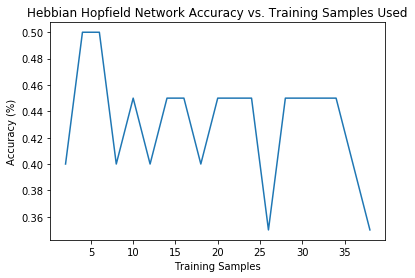

In [23]:
# Test Hebbian-based Hopfield network classification accuracy

x = list()
y = list()

for i in range(1, 20):
    training_set = ones[30:30+i] + fives[30:30+i]
    random.shuffle(training_set)
    
    hf_hebbian = hf_hebbian = HopfieldNetwork(
        train_dataset=training_set,
        mode='hebbian'
    )
    
    hebb_acc = 0.
    for index, image in enumerate(testing_set):
        # Change to plot=True to see low energy state visualizations
        norm = test(hf_hebbian, index, image, "Mode=Hebbian", plot=False)

        if norm <= THRESHOLD:
            hebb_acc += 1
    
    x.append(i*2)
    y.append(hebb_acc / len(testing_set))
    
    print("Hebbian accuracy trained with {} samples:".format(i*2)), (hebb_acc / len(testing_set)) 
    
plot_accuracy(x, y, "Hebbian Hopfield Network Accuracy vs. Training Samples Used")

Storkey accuracy trained with 8 samples: 0.15
Storkey accuracy trained with 10 samples: 0.15
Storkey accuracy trained with 12 samples: 0.45
Storkey accuracy trained with 14 samples: 0.4
Storkey accuracy trained with 16 samples: 0.55
Storkey accuracy trained with 18 samples: 0.2
Storkey accuracy trained with 20 samples: 0.4
Storkey accuracy trained with 22 samples: 0.4
Storkey accuracy trained with 24 samples: 0.45
Storkey accuracy trained with 26 samples: 0.5
Storkey accuracy trained with 28 samples: 0.6
Storkey accuracy trained with 30 samples: 0.5
Storkey accuracy trained with 32 samples: 0.55
Storkey accuracy trained with 34 samples: 0.75
Storkey accuracy trained with 36 samples: 0.65
Storkey accuracy trained with 38 samples: 0.75


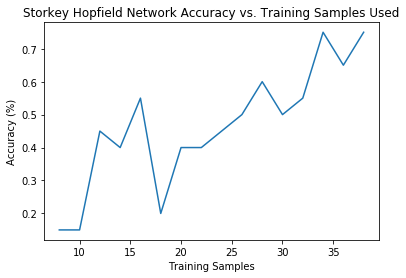

In [21]:
# Test Storkey-based Hopfield network classification accuracy

x = list()
y = list()

for i in range(4, 20):
    training_set_sto = ones[30:30+i] + fives[30:30+i]
    random.shuffle(training_set_sto)
    hf_storkey = HopfieldNetwork(
        train_dataset=training_set_sto,
        mode='storkey'
    )

    sto_acc = 0.
    for index, image in enumerate(testing_set):
        # Change to plot=True to see low energy state visualizations
        norm = test(hf_storkey, index, image, "Mode=Storkey", plot=False)

        if norm <= THRESHOLD:
            sto_acc += 1
            
    x.append(i*2)
    y.append(sto_acc / len(testing_set))
    
    # Uncomment below to show computed accuracies 
    print("Storkey accuracy trained with {} samples:".format(i*2)), (sto_acc / len(testing_set)) 
    
plot_accuracy(x, y, "Storkey Hopfield Network Accuracy vs. Training Samples Used")    

# Comparison

It is clear based on the two plots that the Storkey method offers superior accuracy when it comes to classifying the image vectors produced by the Hopfield network. The Hebbian weight training method consistently scored around the 40%-50% accuracy range while the Storkey weight training method demonstrated an upward trend in the accuracy for increasingly large training sets used.